In [33]:
import os, glob, time, pickle, random
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
from torch.utils.data import Dataset, ConcatDataset
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
import pickle
from matplotlib.colors import LogNorm, ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

class ParquetDataset(Dataset):
    def __init__(self, filename):
        self.parquet = pq.ParquetFile(filename)
        self.cols = None # read all columns
        
        self.cols = ['X_jet.list.item.list.item.list.item']
    def __getitem__(self, index):
        data = self.parquet.read_row_group(index, columns=self.cols).to_pydict()
        data['X_jet'] = np.float32(data['X_jet'][0])
        data['X_jet'][0] = data['X_jet'][0] #Track pT
        data['X_jet'][1] =  data['X_jet'][1] #Track dZ
        data['X_jet'][2] =  data['X_jet'][2] #Track d0
        data['X_jet'][3] =  data['X_jet'][3] #ECAL
        data['X_jet'][4] =  data['X_jet'][4] #HCAL
        return dict(data)
    def __len__(self):
        return self.parquet.num_row_groups
X_CMSI  = ["TracksAtECAL_pt", "TracksAtECAL_dZSig", "TracksAtECAL_d0Sig", "ECAL_energy",
"HBHE_energy", "PixAtEcal_1", "PixAtEcal_2", "PixAtEcal_3", "PixAtEcal_4", "TibAtEcal_1", "TibAtEcal_2",
"TibAtEcal_3", "TibAtEcal_4", "TobAtEcal_1", "TobAtEcal_2", "TobAtEcal_3", "TobAtEcal_4", "TobAtEcal_5",
"TobAtEcal_6", "TidAtEcal_1", "TecAtEcal_1", "TecAtEcal_2", "TecAtEcal_3"]


In [48]:
decays = glob.glob('/storage/local/data1/gpuscratch/bbbam/classification/valid/IMG*')
print(decays)
dset_train = ConcatDataset([ParquetDataset(d) for d in decays])

['/storage/local/data1/gpuscratch/bbbam/classification/valid/IMG_aToTauTau_Hadronic_tauDR0p4_m3p6To14p8_dataset_2_unbaised_v2_0009_train.parquet']


In [104]:
def plotJet_crop(img, eve):
#     out_dir='plot_for_prelim/Img_A_2Tau_unmerged_dR_1_1p5'
#     if not os.path.isdir(out_dir):
#         os.makedirs(out_dir)
    mins = [0.001]*13
    maxs =[]
    for i in range(13):
        maxs.append(img[i].max())
    fig, ax = plt.subplots(figsize=(12,12))
    if maxs[0]  > 0 : plt.imshow(img[0], cmap='Oranges', norm=LogNorm(vmin=mins[0], vmax=maxs[0]),  alpha=0.9)
    if maxs[1]  > 0 : plt.imshow(img[1], cmap='Blues',   norm=LogNorm(vmin=mins[1], vmax=maxs[1]),  alpha=0.9)
    if maxs[2]  > 0 : plt.imshow(img[2], cmap='Greys',   norm=LogNorm(vmin=mins[2], vmax=maxs[2]),  alpha=0.9)
    if maxs[3]  > 0 : plt.imshow(img[3], cmap='Greens',  norm=LogNorm(vmin=mins[3], vmax=maxs[3]),  alpha=0.9)       
    if maxs[4]  > 0 : plt.imshow(img[4], cmap='Blues',   norm=LogNorm(vmin=mins[4], vmax=maxs[4]),  alpha=0.4)   
    if maxs[5]  > 0 : plt.imshow(img[5], cmap='Purples', norm=LogNorm(vmin=mins[5], vmax=maxs[5]),  alpha=0.9)   
    if maxs[10] > 0 : plt.imshow(img[10], cmap= 'pink',  norm=LogNorm(vmin=mins[10],vmax=maxs[10]), alpha=0.9)
    hep.cms.label(llabel=f"Image event number {eve}", rlabel="13 TeV", loc=0, ax=ax)
#     plt.title(f"Image event number {eve} ")
    plt.xlabel(r"$\mathrm{i\varphi}$") #28, 30
    plt.ylabel(r"$\mathrm{i\eta}$") #28, 30
    #LEGEND
    colors = {0:'orange',1:'blue',2:'grey',3:'green',4:'lightblue',5:'purple',6:'pink'}
    labels = {0:'Track pT',1:'dz_sig',2:'d0_sig',3:'ECAL',4:'HCAL',5:'BPix L1',6:'BStrip L1'}
    patches =[mpatches.Patch(color=colors[i],label=labels[i]) for i in colors]
    plt.legend(handles=patches, bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.,fontsize=10 )
#     plt.tight_layout()
#     plt.savefig(f'{out_dir}/{eve}_Cropped_Image_event_crop_{crop_position}.png',facecolor='w',dpi=300,)
    plt.show()

Image for single layer

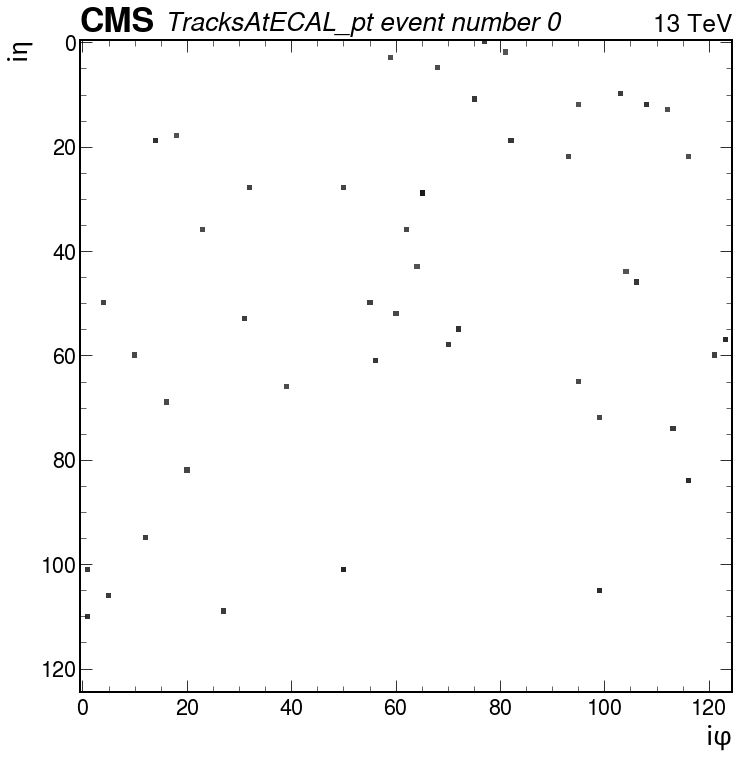

In [103]:
for i, data in enumerate(dset_train):
    if i > 0:
            break
    for layer in range(1):
        img = data["X_jet"][layer]
        maxs = np.max(img)
        mins = 0.0001
        fig, ax = plt.subplots(figsize=(12,12))
        if maxs  > 0 : plt.imshow(img, cmap='Greys', norm=LogNorm(vmin=mins, vmax=maxs),  alpha=0.9)
#         plt.title(f"{X_CMSI[layer]} event number {i} ")
        plt.xlabel(r"$\mathrm{i\varphi}$") #28, 30
        plt.ylabel(r"$\mathrm{i\eta}$") #28
        hep.cms.label(llabel=f" {X_CMSI[layer]} event number {i}", rlabel="13 TeV", loc=0, ax=ax)
        plt.show()

    

Image combined layers

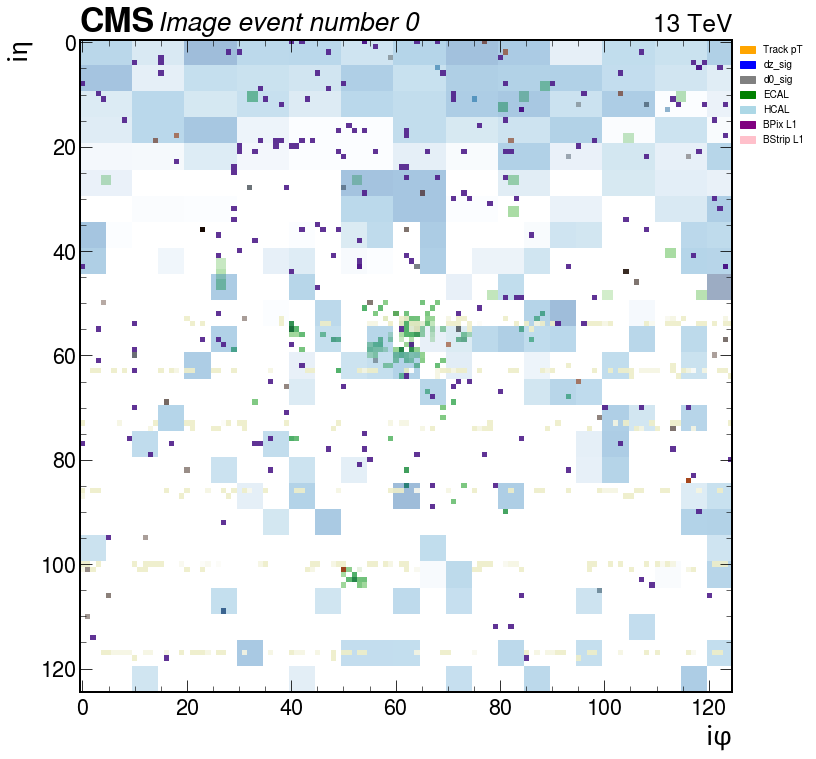

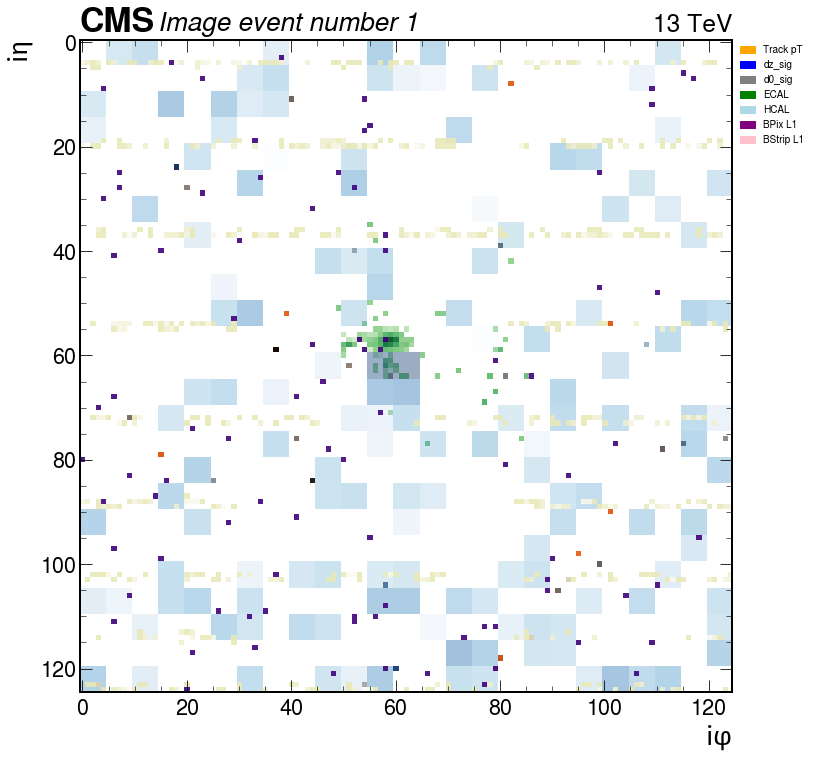

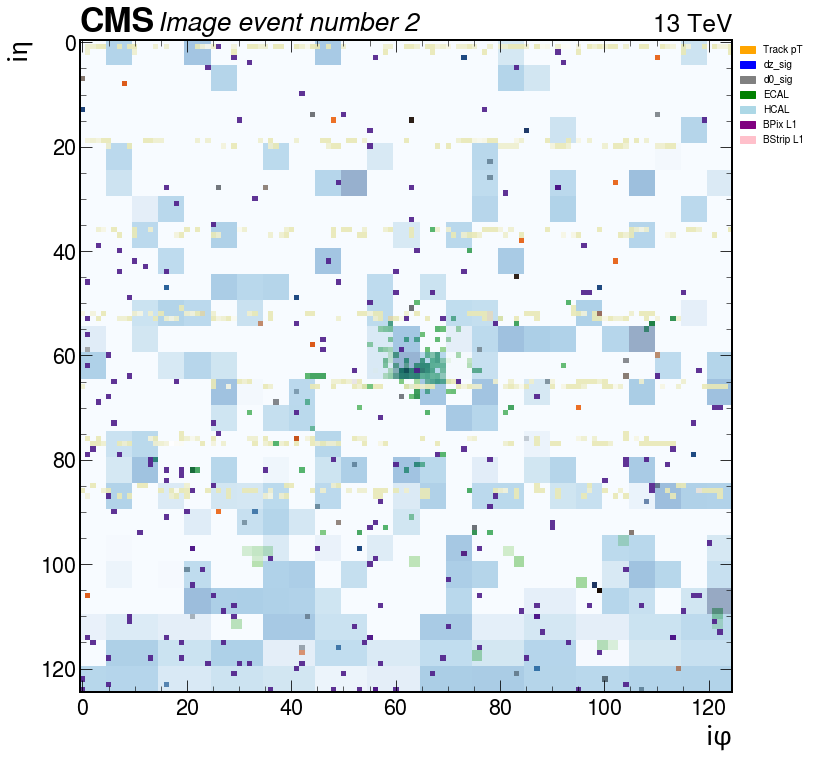

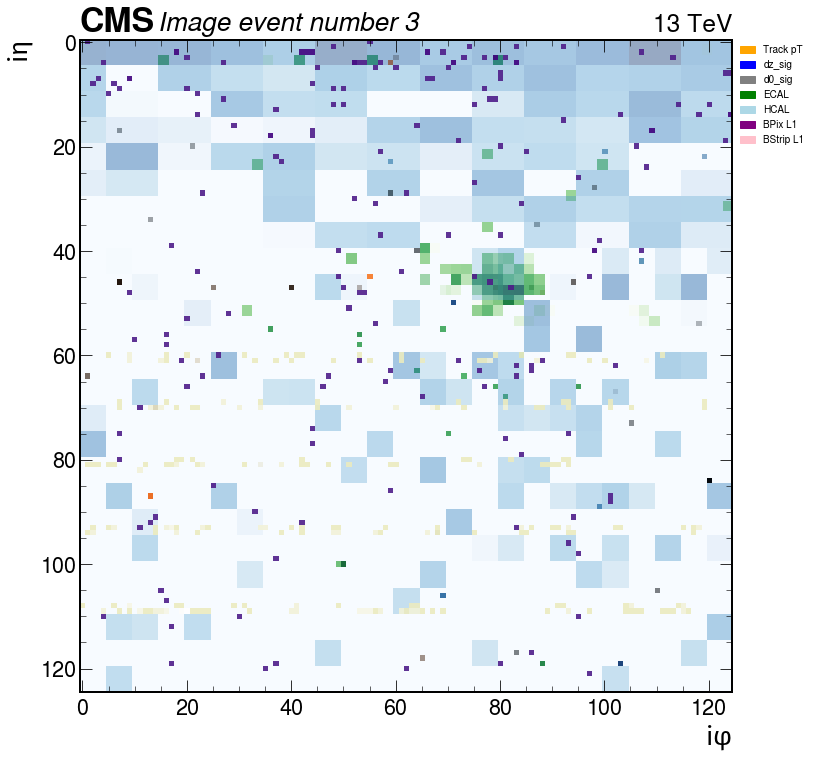

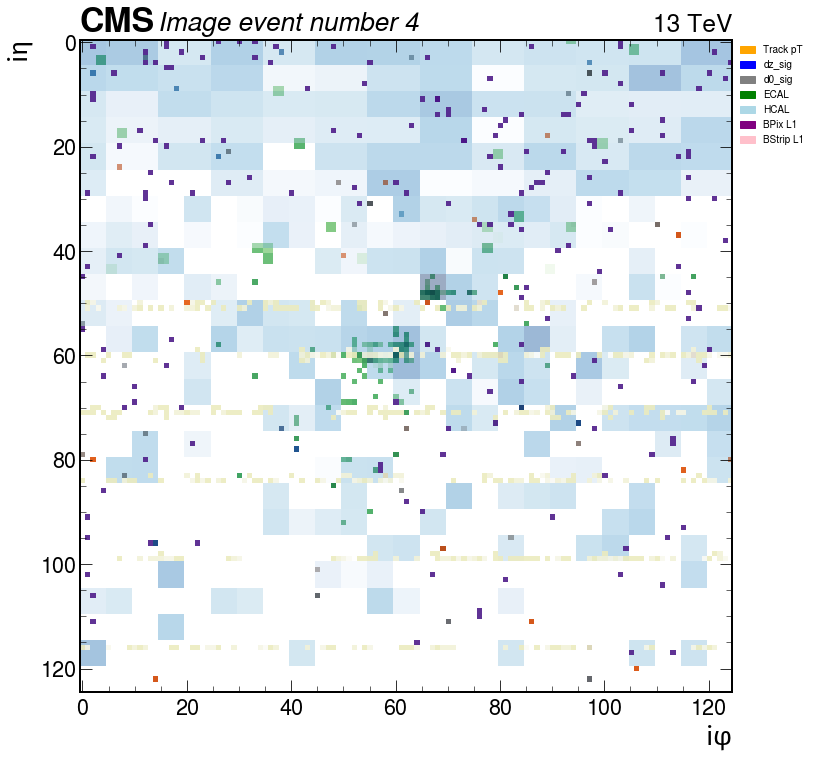

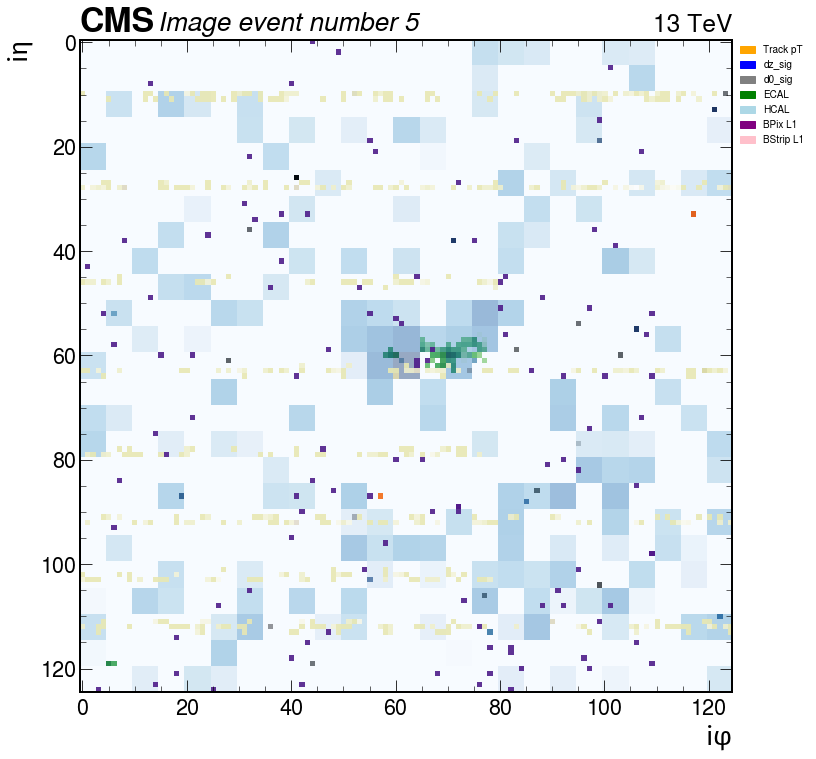

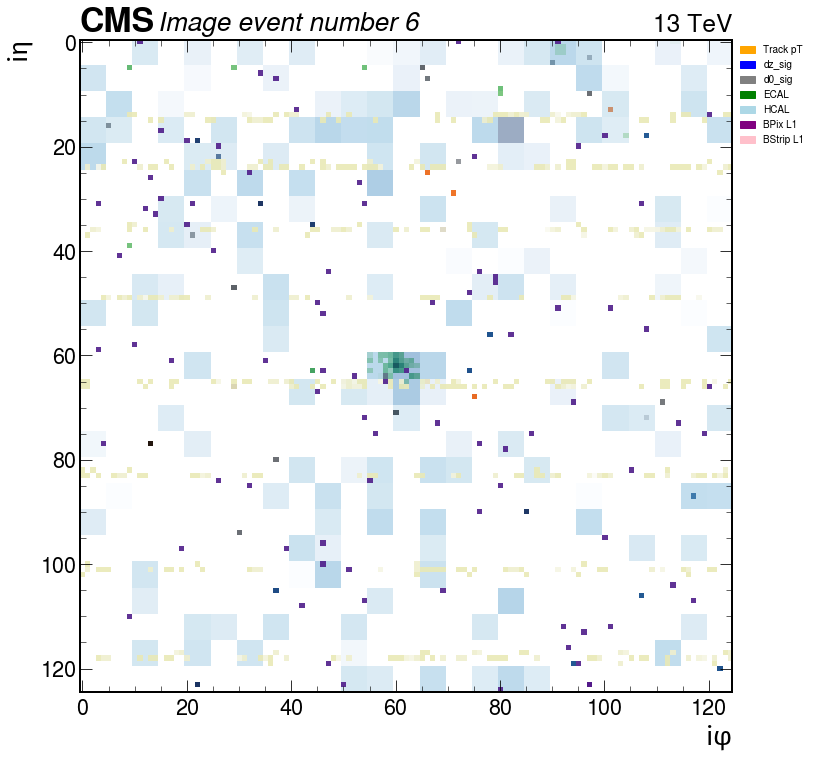

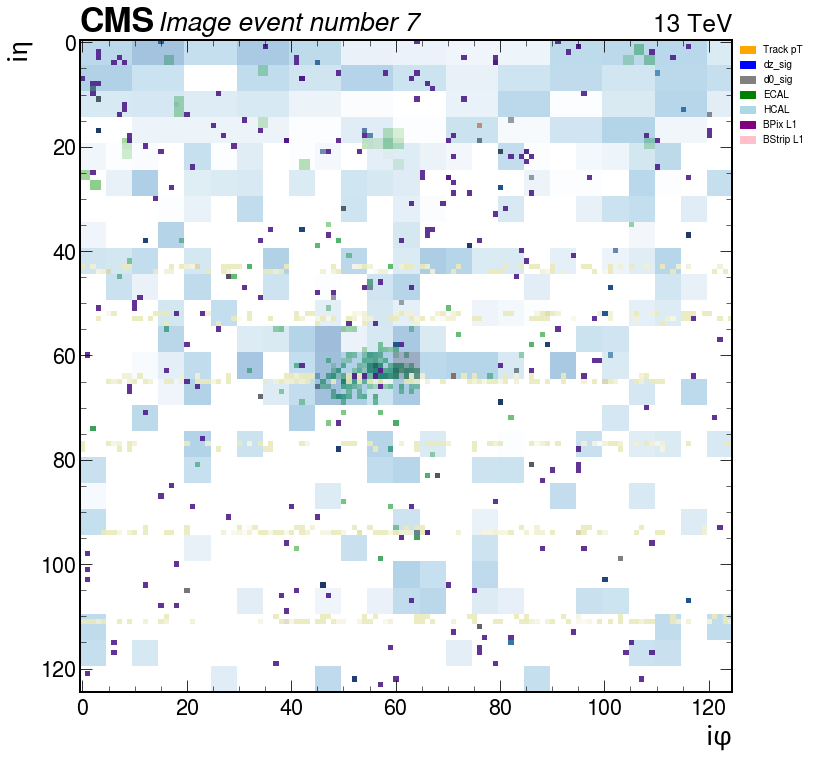

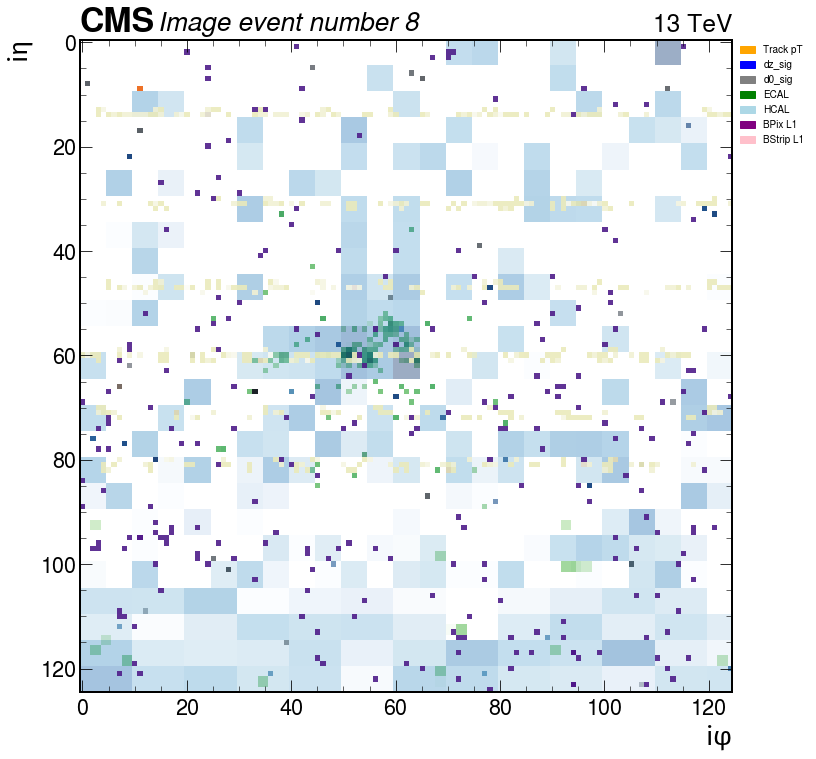

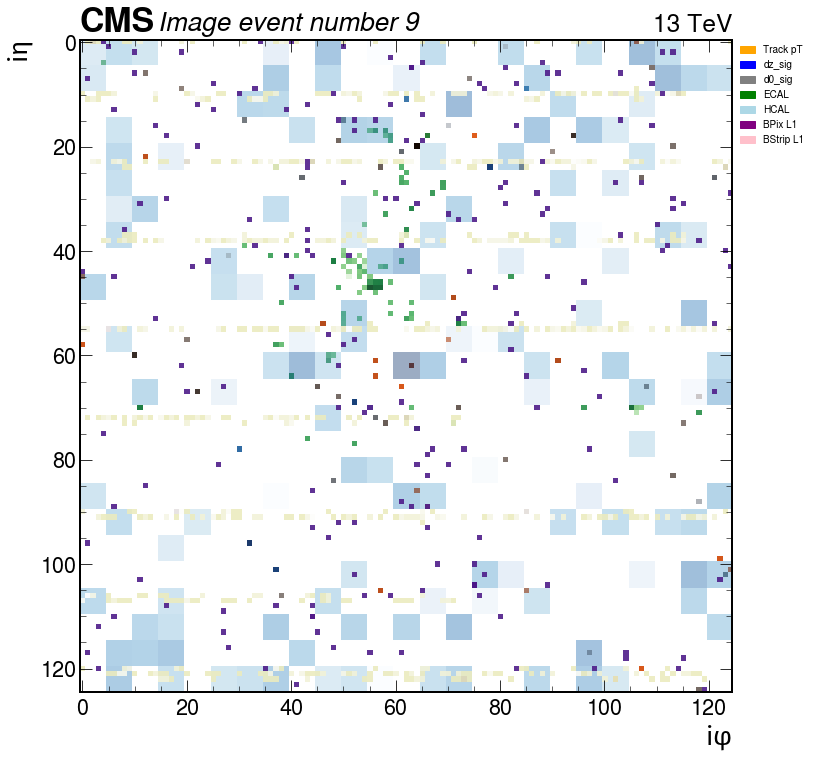

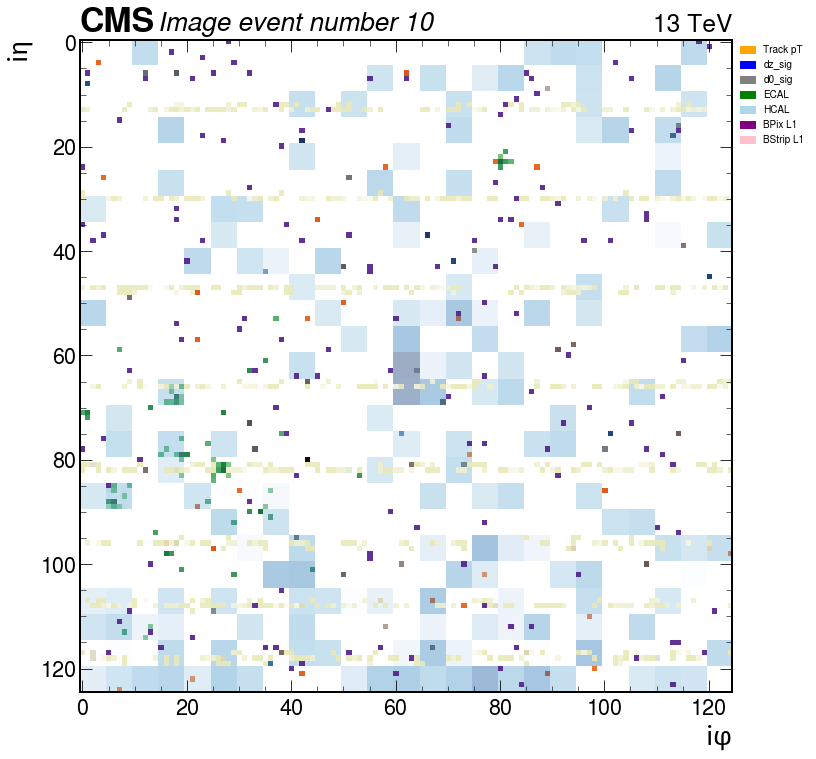

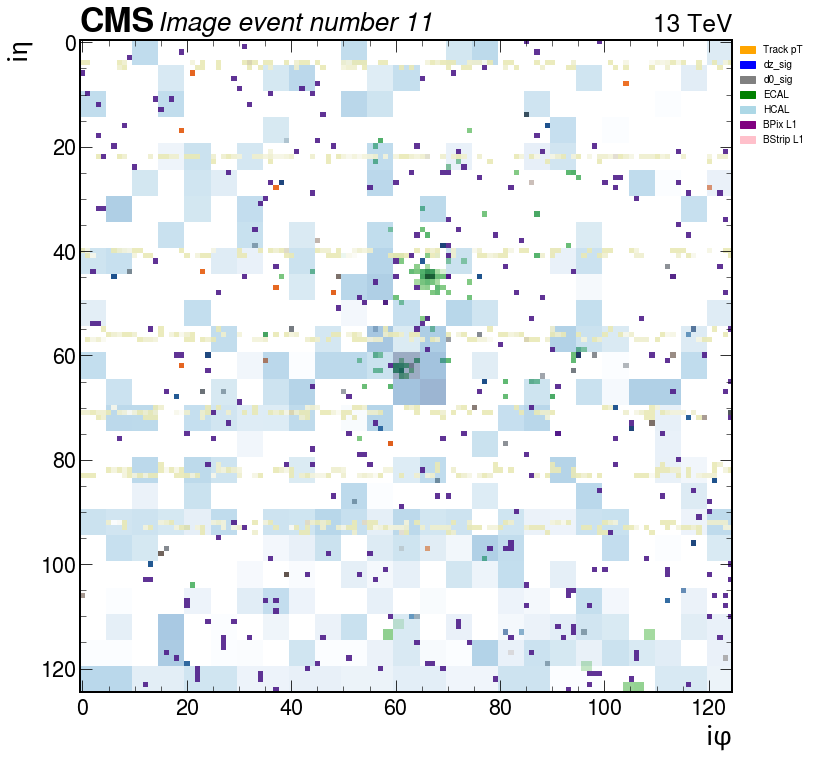

In [105]:
for i, data in enumerate(dset_train):
    plotJet_crop(data['X_jet'],i)
    if i > 10:
            break

Emty percentage for different layers

In [ ]:
for layer in range(13):

    total = 0
    Hcal_zero = 0

    for i, data in enumerate(dset_train):
        if i > 10:
            break

        total += 1
        Hcal = data['X_jet'][layer]
        max_value = np.max(Hcal)
        min_value = np.min(Hcal)
    #         print("Max: ", max_value, "  Min: ", min_value)

        if max_value == 0:
            Hcal_zero += 1

    print(f"{X_CMSI[layer]} empty ", Hcal_zero / total * 100, "%")


Empty percentage for different data set

In [107]:
decays = glob.glob('/storage/local/data1/gpuscratch/bbbam/classification/valid/*')
for file in decays:
    dset_train = ParquetDataset(file)
    print("dataset--", file)
    for i, data in enumerate(dset_train):
        if i > 10:
            break

        total += 1
        Hcal = data['X_jet'][4]
        max_value = np.max(Hcal)
        min_value = np.min(Hcal)
    #         print("Max: ", max_value, "  Min: ", min_value)

        if max_value == 0:
            Hcal_zero += 1

    print(f"{X_CMSI[4]} empty ", Hcal_zero / total * 100, "%")
    


dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/DYToTauTau_M-50_13TeV_valid.parquet
HBHE_energy empty  0.0 %
dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/QCD_Pt-15to7000_valid.parquet
HBHE_energy empty  0.0 %
dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/WJetsToLNu_valid.parquet
HBHE_energy empty  0.0 %
dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/GGH_TauTau_valid.parquet
HBHE_energy empty  0.0 %
dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/TTToHadronic_valid.parquet
HBHE_energy empty  0.0 %
dataset-- /storage/local/data1/gpuscratch/bbbam/classification/valid/IMG_aToTauTau_Hadronic_tauDR0p4_m3p6To14p8_dataset_2_unbaised_v2_0009_train.parquet
HBHE_energy empty  0.0 %
